In [1]:
import pandas as pd
import numpy as np

# Integrantes

In [2]:
members = {
    'RM': ['552226', '98676', '551905', '550782'],
    'Nome': ['Bruno Francisco Brito de Paula', 'Edward de Lima Silva',
             'Gabriel Barroso de Assis França','Kayque Lima Nunes'],
}
group = pd.DataFrame(members)
group.set_index('RM', inplace=True)
group['Turma'] = '2TDSPW'
group

,Nome,Turma
RM,,
552226,Bruno Francisco Brito de Paula,2TDSPW
98676,Edward de Lima Silva,2TDSPW
551905,Gabriel Barroso de Assis França,2TDSPW
550782,Kayque Lima Nunes,2TDSPW


# Asteroid Dataset

Disponível em: https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset.

O dataset conta com vários tipos de dados sobre asteróides, e foi coletado de um instituto tecnológico sob controle da NASA.

## Colunas

Definição básica das colunas

SPK-ID: Identificação primária do objeto SPK

Object ID: Identificação interna do objeto no banco de dados

Object fullname: Nome completo/designação do objeto

pdes: Designação primária do objeto

name: Nome IAU do objeto

NEO: Sinalizador de Objeto Próximo da Terra (NEO)

PHA: Sinalizador de Asteroide Potencialmente Perigoso (PHA)

H: Parâmetro de magnitude absoluta

Diameter: Diâmetro do objeto (da esfera equivalente) em km

Albedo: Albedo geométrico

Diameter_sigma: Incerteza de 1-sigma no diâmetro do objeto em km

Orbit_id: ID da solução orbital

Epoch: Época de osculação no formato de dia juliano modificado

Equinox: Equinócio do referencial

e: Excentricidade

a: Eixo semi-maior em UA (Unidades Astronômicas)

q: Distância do periélio em UA

i: Inclinação; ângulo em relação ao plano eclíptico x-y

tp: Tempo do periélio em Unidade TDB

moid_ld: Distância mínima de interseção orbital com a Terra em UA

## Apresentação dos dados

Características do dataset.

In [23]:
asteroids = pd.read_csv('/content/dataset.csv')
asteroids.head()

<ipython-input-23-f8dc6763419c>:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  asteroids = pd.read_csv('/content/dataset.csv')


,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [4]:
asteroids.describe()

,spkid,pdes,prefix,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,1.482220e+05,148222.000000,0.0,148222.000000,73546.000000,73520.000000,73435.000000,1.482220e+05,148222.000000,1.482220e+05,...,1.482200e+05,1.482200e+05,1.482200e+05,1.482200e+05,1.482200e+05,1.482200e+05,1.482200e+05,1.482200e+05,1.482200e+05,148220.000000
mean,2.074112e+06,74111.500000,NaN,14.952533,7.001360,0.173987,0.425108,2.459000e+06,58999.601456,2.020052e+07,...,8.127534e-06,5.546016e-06,7.046254e-05,3.092248e-04,2.501064e-04,7.431734e-05,3.528568e-09,5.916838e-02,3.713156e-01,0.539989
std,4.278815e+04,42788.150137,NaN,1.228740,12.474456,0.122973,0.946003,4.244539e+01,42.445388,1.168145e+03,...,6.191758e-04,2.205350e-05,6.671592e-04,4.890142e-02,4.729529e-02,1.356775e-02,6.855461e-08,1.377256e+01,8.380231e+01,0.048076
min,2.000001e+06,1.000000,NaN,-1.100000,0.204000,0.001000,0.003000,2.452464e+06,52464.000000,2.002071e+07,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.078624
25%,2.037056e+06,37056.250000,NaN,14.400000,3.196000,0.068000,0.152000,2.459000e+06,59000.000000,2.020053e+07,...,9.511400e-08,4.237900e-06,2.445175e-05,3.520900e-05,1.481300e-05,1.173600e-08,1.598200e-09,6.083850e-05,8.660300e-06,0.512460
50%,2.074112e+06,74111.500000,NaN,15.100000,4.741000,0.147000,0.265000,2.459000e+06,59000.000000,2.020053e+07,...,1.157900e-07,4.882100e-06,3.981000e-05,5.182650e-05,2.066600e-05,1.589700e-08,1.880400e-09,8.926300e-05,1.231400e-05,0.542940
75%,2.111167e+06,111166.750000,NaN,15.800000,7.156000,0.258000,0.496000,2.459000e+06,59000.000000,2.020053e+07,...,1.414700e-07,5.722600e-06,7.316225e-05,8.509000e-05,3.139400e-05,2.187325e-08,2.219600e-09,1.422800e-04,1.801100e-05,0.571380
max,2.148222e+06,148222.000000,NaN,22.700000,939.400000,1.000000,140.000000,2.459000e+06,59000.000000,2.020053e+07,...,1.845500e-01,3.225800e-03,2.016800e-01,1.860100e+01,1.800800e+01,4.652000e+00,9.166700e-06,5.253500e+03,3.085000e+04,0.929050


In [5]:
asteroids.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148222 entries, 0 to 148221
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              148222 non-null  object 
 1   spkid           148222 non-null  int64  
 2   full_name       148222 non-null  object 
 3   pdes            148222 non-null  int64  
 4   name            20136 non-null   object 
 5   prefix          0 non-null       float64
 6   neo             148222 non-null  object 
 7   pha             148222 non-null  object 
 8   H               148222 non-null  float64
 9   diameter        73546 non-null   float64
 10  albedo          73520 non-null   float64
 11  diameter_sigma  73435 non-null   float64
 12  orbit_id        148222 non-null  object 
 13  epoch           148222 non-null  float64
 14  epoch_mjd       148222 non-null  int64  
 15  epoch_cal       148222 non-null  float64
 16  equinox         148222 non-null  object 
 17  e         

In [6]:
# prompt: show columns' correlation

asteroids.corr()


<ipython-input-6-7b8ca6849814>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  asteroids.corr()


,spkid,pdes,prefix,H,diameter,albedo,diameter_sigma,epoch,epoch_mjd,epoch_cal,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
spkid,1.000000,1.000000,NaN,0.589460,-0.235819,-0.205004,0.014580,0.005771,0.005771,0.005829,...,0.002689,0.028636,0.007980,-0.000737,-0.000947,0.001953,0.010809,-0.001073,0.001639,0.493677
pdes,1.000000,1.000000,NaN,0.589460,-0.235819,-0.205004,0.014580,0.005771,0.005771,0.005829,...,0.002689,0.028636,0.007980,-0.000737,-0.000947,0.001953,0.010809,-0.001073,0.001639,0.493677
prefix,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
H,0.589460,0.589460,NaN,1.000000,-0.653561,0.047045,-0.122740,-0.020618,-0.020618,-0.020423,...,-0.083596,-0.108013,-0.019598,-0.028482,-0.028277,-0.032108,-0.133646,-0.025967,-0.025488,0.571837
diameter,-0.235819,-0.235819,NaN,-0.653561,1.000000,-0.207476,0.373272,-0.008298,-0.008298,-0.007146,...,0.204835,0.053523,-0.023738,0.144810,0.218792,0.073542,0.120495,0.264190,0.076342,-0.274613
albedo,-0.205004,-0.205004,NaN,0.047045,-0.207476,1.000000,-0.039993,-0.004158,-0.004158,-0.004168,...,-0.008079,-0.144216,-0.075665,-0.068221,-0.021427,-0.005454,-0.026856,-0.006898,-0.005406,-0.188628
diameter_sigma,0.014580,0.014580,NaN,-0.122740,0.373272,-0.039993,1.000000,0.003274,0.003274,0.003261,...,0.482062,0.305538,0.008944,0.359191,0.502774,0.257699,0.423323,0.573650,0.262767,0.009913
epoch,0.005771,0.005771,NaN,-0.020618,-0.008298,-0.004158,0.003274,1.000000,1.000000,0.999697,...,0.000117,-0.001504,0.000559,0.000051,0.000045,0.000049,0.000214,0.000039,0.000040,0.021919
epoch_mjd,0.005771,0.005771,NaN,-0.020618,-0.008298,-0.004158,0.003274,1.000000,1.000000,0.999697,...,0.000117,-0.001504,0.000559,0.000051,0.000045,0.000049,0.000214,0.000039,0.000040,0.021919
epoch_cal,0.005829,0.005829,NaN,-0.020423,-0.007146,-0.004168,0.003261,0.999697,0.999697,1.000000,...,0.000117,-0.001473,0.000563,0.000051,0.000045,0.000050,0.000216,0.000039,0.000040,0.021941


## Limpeza dos Dados

In [28]:
# Mantendo Magnitude Absoluta (medida da luminosidade), diâmetro em KM, Albedo (medida de reflexão de luz)
asteroids = asteroids[['H', 'diameter', 'albedo', 'e']]
asteroids

,H,diameter,albedo,e
0,3.400,939.400,0.0900,0.076009
1,4.200,545.000,0.1010,0.229972
2,5.330,246.596,0.2140,0.256936
3,3.000,525.400,0.4228,0.088721
4,6.900,106.699,0.2740,0.190913
...,...,...,...,...
958519,17.135,NaN,NaN,0.185919
958520,18.500,NaN,NaN,0.282920
958521,20.400,NaN,NaN,0.662446
958522,18.071,NaN,NaN,0.202053


In [29]:
asteroids = asteroids.dropna()
asteroids

,H,diameter,albedo,e
0,3.40,939.400,0.0900,0.076009
1,4.20,545.000,0.1010,0.229972
2,5.33,246.596,0.2140,0.256936
3,3.00,525.400,0.4228,0.088721
4,6.90,106.699,0.2740,0.190913
...,...,...,...,...
891599,16.20,3.793,0.0210,0.159579
891841,17.40,2.696,0.0610,0.074890
894103,17.20,3.271,0.0720,0.287894
901055,16.00,3.009,0.0780,0.240246


## Análise Estatística Exploratória



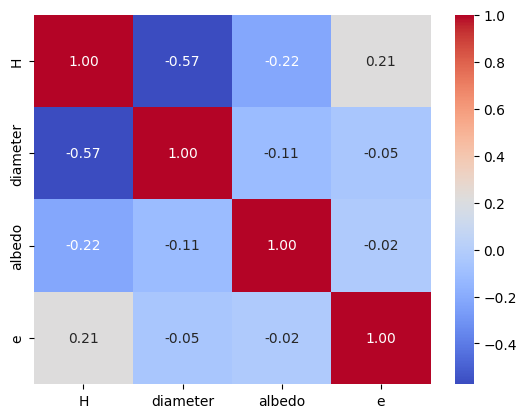

In [31]:
# prompt: create a correlation matrix plot

import matplotlib.pyplot as plt
import seaborn as sns

# Create a correlation matrix
corr_matrix = asteroids.corr()

# Generate a heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


Há uma correlação positiva entre diâmetro e albedo, o que indica que asteróides mais largos tendem a refletir mais luz solar.



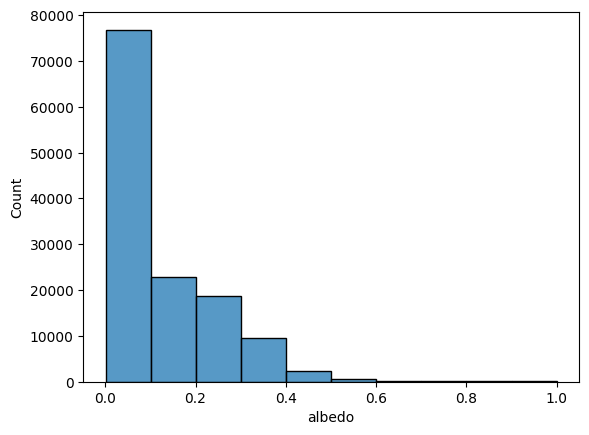

In [40]:
# prompt: create now an histogram plot using the albedo column

import matplotlib.pyplot as plt
sns.histplot(asteroids['albedo'], bins=10, color='blue')
plt.xlabel('Albedo')
plt.ylabel('Frequency')
plt.title('Histogram of Albedo')
plt.show()


Há poucos asteróides que refletem muita luz, com a maioria próxima de uma média.



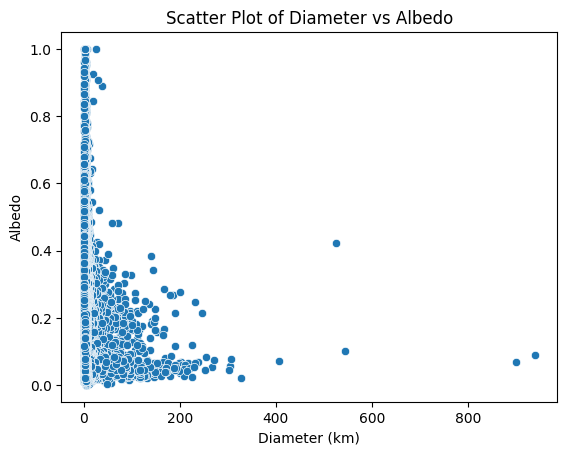

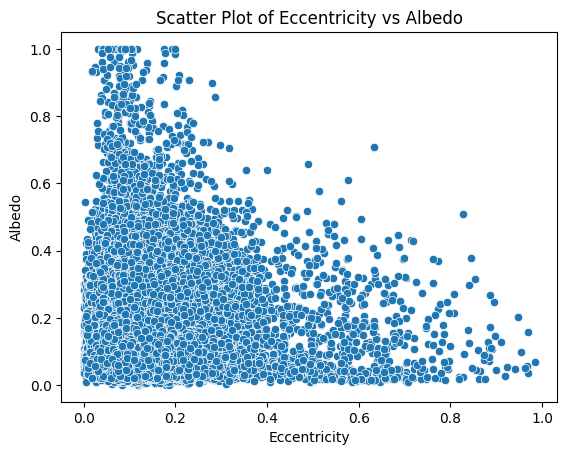

In [41]:
# prompt: create dispersion plots
import matplotlib.pyplot as plt
# Create a scatter plot of diameter vs. albedo
sns.scatterplot(x="diameter", y="albedo", data=asteroids)
plt.xlabel("Diameter (km)")
plt.ylabel("Albedo")
plt.title("Scatter Plot of Diameter vs. Albedo")
plt.show()

# Create a scatter plot of eccentricity vs. albedo
sns.scatterplot(x="e", y="albedo", data=asteroids)
plt.xlabel("Eccentricity")
plt.ylabel("Albedo")
plt.title("Scatter Plot of Eccentricity vs. Albedo")
plt.show()

A relação entre excentricidade e albedo não é das mais fortes

## Treinamento dos modelos

Regressão linear e poliminial.


### Linear Regression


In [42]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

MAE: 0.08834608161990072
MSE: 0.012547913127715058
RMSE: 0.11201746795797099


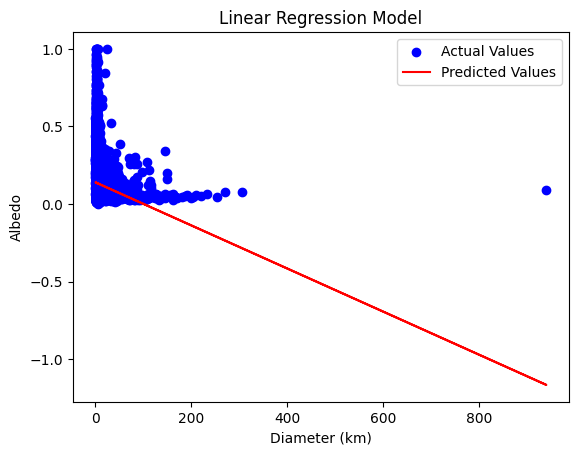

In [43]:
# prompt: create a linear regression model with diameter as target

import matplotlib.pyplot as plt
import numpy as np
# Create a linear regression model
model = LinearRegression()

# Define target and independent variables
target = asteroids['diameter']
predictors = asteroids[['albedo']]

# Train the model
model.fit(predictors, target)

# Extract the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Print the results
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Make predictions
predictions = model.predict(predictors)

# Evaluate the model
print("MAE:", metrics.mean_absolute_error(target, predictions))
print("MSE:", metrics.mean_squared_error(target, predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(target, predictions)))

# Plot the results
plt.scatter(predictors, target, color='blue')
plt.plot(predictors, predictions, color='red', linewidth=2)
plt.xlabel("Albedo")
plt.ylabel("Diameter (km)")
plt.title("Linear Regression Model of Diameter vs. Albedo")
plt.show()


In [50]:
model.score(X_test, y_test)

0.011830891163219004

Aparentemente, este não é o melhor modelo para este conjunto de dados.

### Polynomial Regression


Intercept: 7.294613635204502
Coefficients: [  0.         -15.49713532  12.51074667]
MAE: 3.1098325030564857
MSE: 90.50494751857606
RMSE: 9.513408827469576


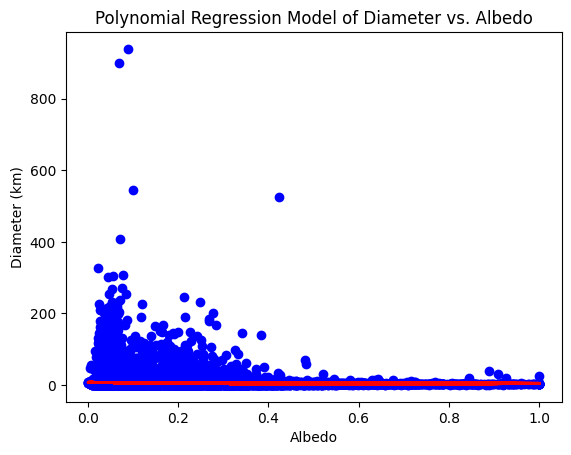

In [62]:
# prompt: now create a new polynomial model with albedo as target and extract insights

import matplotlib.pyplot as plt
import numpy as np
# Create a polynomial regression model
from sklearn.preprocessing import PolynomialFeatures

# Create a polynomial features object with degree 2
poly_features = PolynomialFeatures(degree=2)

# Transform the albedo feature
poly_albedo = poly_features.fit_transform(asteroids[['albedo']])

# Create a new linear regression model
model = LinearRegression()

# Train the model
model.fit(poly_albedo, asteroids['diameter'])

# Extract the intercept and coefficients
intercept = model.intercept_
coefficients = model.coef_

# Print the results
print("Intercept:", intercept)
print("Coefficients:", coefficients)

# Make predictions
predictions = model.predict(poly_albedo)

# Evaluate the model
print("MAE:", metrics.mean_absolute_error(asteroids['diameter'], predictions))
print("MSE:", metrics.mean_squared_error(asteroids['diameter'], predictions))
print("RMSE:", np.sqrt(metrics.mean_squared_error(asteroids['diameter'], predictions)))

# Plot the results
plt.scatter(asteroids['albedo'], asteroids['diameter'], color='blue')
plt.plot(asteroids['albedo'], predictions, color='red', linewidth=2)
plt.xlabel("Albedo")
plt.ylabel("Diameter (km)")
plt.title("Polynomial Regression Model of Diameter vs. Albedo")
plt.show()

Este modelo polinomial obteve maior desempenho, sugerindo que há uma relação não linear entre albedo e diâmetro. Podemos considerar que quanto maior o diâmetro de um corpo, mais luz ele refletirá - mas a taxa de aumento não é costante - o que pode dar a entender que a área de superfície de contato do corpo com a luz é fator determinante.